# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [12]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

In [13]:
#Import all models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Instantiate all three models with max_Depth = 5
decisonTree = DecisionTreeRegressor(max_depth = 5)

#Need to set random_state since random forest is already random
randomForest = RandomForestRegressor(max_depth = 5, random_state = 0)

gradientBoosting = GradientBoostingRegressor(max_depth = 5)

#Implement each machine learning model with X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

decisonTree.fit(X_train, y_train)
randomForest.fit(X_train, y_train)
gradientBoosting.fit(X_train, y_train)





GradientBoostingRegressor(max_depth=5)

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

In [14]:
from sklearn.model_selection import cross_validate

#MSE mean with cross-validation for Decison Tree
decisonTree_scores = cross_validate(decisonTree, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error',
                                    return_train_score = True)
decisonTree_train_score = decisonTree_scores['train_score'].mean() * -1
decisonTree_test_score = decisonTree_scores['test_score'].mean() * -1

#MSE mean with cross-validation for Random Forest
randomForest_scores = cross_validate(randomForest, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error',
                                    return_train_score = True)
randomForest_train_score = randomForest_scores['train_score'].mean() * -1
randomForest_test_score = randomForest_scores['test_score'].mean() * -1

#MSE mean for cross-validation for Gradient Boosting
gradientBoosting_scores = cross_validate(gradientBoosting, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error',
                                    return_train_score = True)
gradientBoosting_train_scores = gradientBoosting_scores['train_score'].mean() * -1
gradientBoosting_test_scores = gradientBoosting_scores['test_score'].mean() * -1


### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [15]:
results = pd.DataFrame(columns = ['Model', 'Training Accuracy', 'Validation Accuracy'])
results['Model'] = ['DT', 'RF', 'GB']
results.set_index(['Model'], inplace = True)

results['Training Accuracy'] = [decisonTree_train_score,randomForest_train_score, gradientBoosting_train_scores]
results['Validation Accuracy'] = [decisonTree_test_score, randomForest_test_score, gradientBoosting_test_scores]
display(results)
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

,Training Accuracy,Validation Accuracy
Model,,
DT,47.279761,71.444536
RF,29.577455,45.059351
GB,3.379440,23.144381


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [16]:
# TO DO: ADD YOUR CODE HERE

#R2 mean with cross-validation for Decison Tree
decisonTree_scores = cross_validate(decisonTree, X_train, y_train, cv = 5, scoring = 'r2',
                                    return_train_score = True)
decisonTree_train_score = decisonTree_scores['train_score'].mean()
decisonTree_test_score = decisonTree_scores['test_score'].mean()

#R2 mean with cross-validation for Random Forest
randomForest_scores = cross_validate(randomForest, X_train, y_train, cv = 5, scoring = 'r2',
                                    return_train_score = True)
randomForest_train_score = randomForest_scores['train_score'].mean()
randomForest_test_score = randomForest_scores['test_score'].mean()

#R2 mean for cross-validation for Gradient Boosting
gradientBoosting_scores = cross_validate(gradientBoosting, X_train, y_train, cv = 5, scoring = 'r2',
                                    return_train_score = True)
gradientBoosting_train_scores = gradientBoosting_scores['train_score'].mean()
gradientBoosting_test_scores = gradientBoosting_scores['test_score'].mean()

#Visualize results 
results = pd.DataFrame(columns = ['Model', 'Training Accuracy', 'Validation Accuracy'])
results['Model'] = ['DT', 'RF', 'GB']
results.set_index(['Model'], inplace = True)

results['Training Accuracy'] = [decisonTree_train_score,randomForest_train_score, gradientBoosting_train_scores]
results['Validation Accuracy'] = [decisonTree_test_score, randomForest_test_score, gradientBoosting_test_scores]
display(results)

,Training Accuracy,Validation Accuracy
Model,,
DT,0.834465,0.738958
RF,0.896557,0.840927
GB,0.988171,0.919405


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. For assignment 2, using the concrete dataset with a linear model, we got a r2 score of 0.61 for the training score and a validation score of 0.62 for R2. For mean squared errors, we got a training score of 111, and a validation score of 96. Our non-linear models are all better than the linear model we used. A decison tree gave a the least improvement with a R2 of 0.83 and a mean squared error of 47 on the training set. The testing score was less, with a score of 0.74 for R2 and a mean squared error of 71. The best model was the gradient boosted tree. the gradient boosted regression tree gave a R2 of 0.988 and a mean squared error of 3.38 on the training set. A R2 of 0.92 and a mean squared error of 23 for the validation test. The random forest regression model results were between the decison trees and the gradient boosted trees results. As you can see, all non-linear models gave better results than the linear model, with gradient boosted regression tree model being the best.

2. I would select the gradient boosted regression tree model. This model gave us the highest training scores with a R2 of 0.988 and a mean squared error of 3.38. It's validation score is only a little behind with a R2 of 0.92 and a mean squared error of 23. With already great results, we can also tune our model even more using parameters such as n_estimaters, learning_rate, and max_depth to get better results. For example, when we compare our R2 scores on the data, we can see we might be overfitting slightly. So we can use a low learning_rate to reduce the mode|ls complexity, and thus reduce the overfitting.

3. We can always use max_depth, which is shared across all 3 models. For all 3 models, we can make cases that we are slightly overfitting, and thus limiting the max_depth can give us better accuracy results. For the random forest models we have parameters such as n_estimaters and max_features that can be used to improve accuracy results. Such as increasing n_estimaters for the random forest model will reduce overfitting since we are averaging more trees. Same could be said for max_features. A small max_features reduces overfitting as well. For gradient boosted tree models, we can use n_estimaters, learning_rate to optimize the accuracy results. A small learning_rate and n_estimaters will reduce overfitting.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I-Cheng Yeh, August 2nd/2007, "Concrete Compressive Strength", UCI Machine Learning Repository. [Online]. Available : https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

2. I started with data input and imported the dataset into two dataframes. I did not process the data since we did that in the last assignment. Then, I implemented the 3 models, decison tree model, random forest  model, and the gradient boosted tree model. I split the data into training and test sets, and trained the three models. Afterwords, I validated the models by analysing their R2  and mean squared error score for the training and validation tests. Finally, I visualized the results by creating a dataframe that shows all mean squared error training scores and validation scores for all three models. I also visualized the results for the R2 score for all three models.

3. I did not use generative AI on this part of the assignment.

4. I did not struggle with this part of the assignment. I think having an understanding of all 3 models, before I opened up the assignment helped me a lot in this part of the assignment.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [17]:
# TO DO: Import wine dataset
#!more "wine.names"
all_data = pd.read_csv(r'wine.data', names = ['class','Alcohol', 'Malicacid','Ash', 'Alcalinity_of_ash', 'Magnesium', 
                                              'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 
                                              'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline'])

X = all_data.drop(columns = 'class')
y = all_data['class']
print(X.shape)
print(y.shape)


(178, 13)
(178,)


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [18]:
# TO DO: ADD YOUR CODE HERE
display(all_data.head())

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [19]:
# TO DO: ADD YOUR CODE HERE
print(X.isnull().sum())
print('\n')
print(y.isnull().sum())

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64


0


How many samples do we have of each type of wine?

In [20]:
# TO DO: ADD YOUR CODE HERE
samples = y.value_counts()
samples_1 = samples[1]
samples_2 = samples[2]
samples_3 = samples[3]
print('Samples of type 1: ',samples_1)
print('Samples of type 2: ',samples_2)
print('Samples of type 3: ',samples_3)

Samples of type 1:  59
Samples of type 2:  71
Samples of type 3:  48


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

In [21]:
#Import SVC and DecisonTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

#Instatiate models as SVC() and DecisonTreeClassifier(max_depth = 3)
linearSVC = LinearSVC()
decisonTree = DecisionTreeClassifier(max_depth = 3)

#Implement the machine learning model with X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

linearSVC.fit(X_train, y_train)
decisonTree.fit(X_train, y_train)




C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


DecisionTreeClassifier(max_depth=3)

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

In [22]:
from sklearn.model_selection import cross_validate

linearSVC_scores = cross_validate(linearSVC, X_train, y_train, cv = 5, scoring = 'accuracy', return_train_score = True)
linearSVC_train_score = linearSVC_scores['train_score'].mean()
linearSVC_test_score =  linearSVC_scores['test_score'].mean()

decisonTree_scores = cross_validate(decisonTree, X_train, y_train, cv = 5, scoring = 'accuracy', return_train_score = True)
decisonTree_train_score = decisonTree_scores['train_score'].mean()
decisonTree_test_score =  decisonTree_scores['test_score'].mean()



C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will ch

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [23]:
results = pd.DataFrame(columns = ['Model','Data Size for Training','Data Size for Testing', 'Training Accuracy', 'Validation Accuracy'])
results['Model'] = ['SVC', 'Decison Tree Classifier']
results['Data Size for Training'] = [X_train.shape, X_train.shape]
results['Data Size for Testing'] = [X_test.shape, X_test.shape]
results.set_index(['Model'], inplace = True)

results['Training Accuracy'] = [linearSVC_train_score, decisonTree_train_score]
results['Validation Accuracy'] = [linearSVC_test_score, decisonTree_test_score]
display(results)
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

,Data Size for Training,Data Size for Testing,Training Accuracy,Validation Accuracy
Model,,,,
SVC,"(133, 13)","(45, 13)",0.798801,0.797721
Decison Tree Classifier,"(133, 13)","(45, 13)",0.994357,0.871795


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [28]:
# TO DO: Implement best model
# Decison tree gave me the highest accuracy
pred_decisonTree = decisonTree.predict(X_test)

Text(170.97222222222223, 0.5, 'True Value')

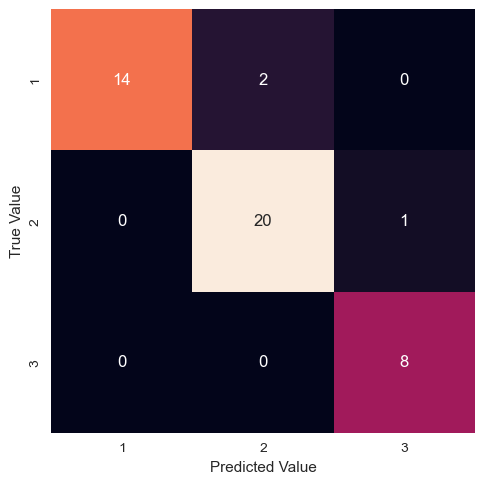

In [29]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_decisonTree, labels = [1, 2, 3])

sns.heatmap(confusion, xticklabels = [1, 2, 3],  yticklabels =  [1, 2, 3], square = True, annot = True, cbar = False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [30]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
class_Report = classification_report(y_test, pred_decisonTree, target_names = ['1', '2', '3'])
print(class_Report)


              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. For the decison tree classifier, we got a training score of 0.994 and a validation score of 0.872. For the linear support vector classification we got a training score of 0.799, and a validation score of 0.798. It appears that the decisosn tree model is much better than the SVC model. From looking at the models themselves, it appears that the decison tree classifier is overfitting, a common issue among tree models. For SVC, it appears that the model be underfitting.
2. This could be because of scaling. From the attributes we can see a values be high as 1000, and low as 0.1. This is a difference of 10^4, possibly causing a scaling issue. Another possible issue is that this dataset is simply better handled by non-linear models instead of linear models. This particular dataset might be hard to seperate linearly, while decison tree model can partition the model with various nodes.
3. 3 Samples.
4. Percison is more important in this case. We are trying to find the correct cultivators that each wine comes from. That means we are trying to reduce false positives, or in other words, reduce the amount of wine incorrectly labeled to a particular cultivator. This will cause less damage than recall since recall is used to avoid false negatives. In other words, try to label everything positive even if it is wrong. In this case, recall is useless, since incorrectly labeling something negative doesn't have an adverse effects.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. S. Aeberhard, M. Forina, June 30th/1991, "Wine", UCI Machine Learning Repository. [Online]. Available : https://archive.ics.uci.edu/dataset/109/wine
2. I started with data input and imported the dataset. I than determined the feature matrix and the target matrix, and put them into variables X and y. I processed the data by determining if there are any null values. I also calculated the number of samples for each unique classification. Then, I implemented the 2 models, SVC and deciston tree classifier model. I split the data into training and test sets, and trained the two models. Afterwords, I validated the models by analysing their training and validation scores. I visualized the results with a dataframe that showed the data size for each model, as well as the training and validation scores. Finally, I made a confusion matrix and a classification report for the best model.
3. I did use chatGPT to help me load in the dataset. I simply asked chatGPT how to add columns to a datasheet that doesn't have any. I also asked chatGPT how to label a confusion matrix. I did need to modify my code to add the columns for the dataset and properly label the confusion matrix. This was because I did not understand how the functions fully worked.
4. I did struggle loading the dataset, but after that it was simply following the steps we previous learned. I also struggled with the confusion matrix as well, since I did not know that class labels is supposed to match the label inside the dataset.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

I found consistently that the tree models have a tendancy to overfit. For example, the decison tree model in the first part had a training score of 0.83 and a validation score of 0.74. The decison tree model in the second part had a validation score of 0.99 and a validation score of 0.88. I do feel like this is a non issue for tree models though, because they have so many parameters to help reduce overfitting such as n_estimaters or max_depth.                             

I also find that the random forest model and gradient boosting machine models are much better than decison tree model. For example, the validation scores of random forest and gradient boosting machine in the first part is 0.84 and 0.92, respectively. Compared to 0.74 validation score of decison tree for the first part, these two ensembles models are much better. This makes sense, because random forest and gradient boosting machine are both built on top of decison tree model.

SVC also appears to struggle with scaling. For example, looking at the attribute "Proline", we get numbers that reach 10^3 magnitudes. Another attribute in the dataset is "Nonflavanoid_phenols", which has numbers that are 10^-1. This gives us a difference of 10^4 magitude for the two attributes, which can cause a scaling issue for SVM models.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked how I got to see how different each tree model is, and how good random forest and gradient boosting machine models are. I did not dislike much in this assignment. I did find copying each attribute name onto columns parameter when loading in the dataset annoying, but thats about it.

I found seeing the difference between the three tree models in the first part interesting. It was also fun talking about how we could improve each model with the parameters.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [31]:
# TO DO: ADD YOUR CODE HERE
#Import all relevant methods
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

#Instatiate model
linearSVC = LinearSVC(max_iter = 5000)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

linearSVC.fit(X_train, y_train)

#Check for the accuracy
linearSVC_scores = cross_validate(linearSVC, X_train, y_train, cv = 5, scoring = 'accuracy', return_train_score = True)
linearSVC_train_score = linearSVC_scores['train_score'].mean()
linearSVC_test_score =  linearSVC_scores['test_score'].mean()

#Print results

results = pd.DataFrame(columns = ['Data Size for Training','Data Size for Testing', 'Training Accuracy', 'Validation Accuracy'])
results['Data Size for Training'] = [X_train.shape]
results['Data Size for Testing'] = [X_test.shape]

results['Training Accuracy'] = [linearSVC_train_score]
results['Validation Accuracy'] = [linearSVC_test_score]
display(results)





C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ravee\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will ch

,Data Size for Training,Data Size for Testing,Training Accuracy,Validation Accuracy
0,"(133, 13)","(45, 13)",0.943625,0.909687


*ANSWER HERE*

It did improve the results by quite a bit. Previously, using the defualt SVC model, we had a training and validation score of 0.799 and 0.798, respectively. For the linearSVC model with 5000 iterations, we got a training score of 0.943 and a validation score of 0.910. A possible reason why we got a better result for the new SVC model is because we set a max_iter to 5000. This allows the model to converge and find the optimal solution. Also using more iterations can allow the model to deal with unscaled data much better since it taking more time to find a better solution.

linearSVC is not be a good fit for the dataset because of scaling. The attributes of the datasets can values that differ by magnitudes of 10^4, and that can adversely affect the model. We can fix this by scaling the dataset. Also it's worth noting even with a higher iteration, the SVC model is still lacking behind the decison tree model. A ensemble model will be even better since they handle overfitting much better than a normal decison tree model.